# EDA on PM2.5, DALYs, and Socio-Demographic Index Dataset

### 1. Import Libraries

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
# Set style
sns.set(style="whitegrid")

### 2. Load the Dataset

In [86]:
df = pd.read_csv("../1_datasets/final_datasets/final_gbd_pm25_sdi.csv")
df.head()

,measure,country,cause,risk-exposure-impact,metric,year,measure val,upper,lower,pm25 concentration,pm25 lower bound,pm25 upper bound,sdi mean value
0,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2010,0.221882,0.296283,0.128691,47.18,44.59,49.38,0.641521
1,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Rate,2010,793.957477,1068.976845,455.632535,47.18,44.59,49.38,0.641521
2,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2011,0.234283,0.307520,0.138086,51.92,45.85,59.45,0.651448
3,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Rate,2011,835.920051,1110.785446,492.084815,51.92,45.85,59.45,0.651448
4,DALYs (Disability-Adjusted Life Years),China,Stroke,Ambient particulate matter pollution,Percent,2012,0.249782,0.321437,0.151426,53.43,46.71,59.15,0.657144


### 3. Basic Information

In [83]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   measure               1500 non-null   object 
 1   country               1500 non-null   object 
 2   cause                 1500 non-null   object 
 3   risk-exposure-impact  1500 non-null   object 
 4   metric                1500 non-null   object 
 5   year                  1500 non-null   int64  
 6   measure val           1500 non-null   float64
 7   upper                 1500 non-null   float64
 8   lower                 1500 non-null   float64
 9   pm25 concentration    1500 non-null   float64
 10  pm25 lower bound      1500 non-null   float64
 11  pm25 upper bound      1500 non-null   float64
 12  sdi mean value        1500 non-null   float64
dtypes: float64(7), int64(1), object(5)
memory usage: 152.5+ KB


### 4. Missing Values

In [87]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
measure                 0
country                 0
cause                   0
risk-exposure-impact    0
metric                  0
year                    0
measure val             0
upper                   0
lower                   0
pm25 concentration      0
pm25 lower bound        0
pm25 upper bound        0
sdi mean value          0
dtype: int64


### 5. Descriptive Statistics

In [89]:
print("\nDescriptive Statistics:")
df.describe()


Descriptive Statistics:


,year,measure val,upper,lower,pm25 concentration,pm25 lower bound,pm25 upper bound,sdi mean value
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.00000,1500.000000,1500.000000
mean,2014.500000,160.341199,214.974186,109.023721,26.48172,21.73276,32.230880,0.661235
std,2.873239,339.359690,434.776690,247.619949,19.65262,15.07412,26.459132,0.172981
min,2010.000000,0.017875,0.032108,0.006584,6.31000,3.69000,6.500000,0.247760
25%,2012.000000,0.089532,0.127897,0.058519,11.70000,9.67000,12.840000,0.542389
50%,2014.500000,7.752537,11.004245,4.169045,18.78500,16.07500,20.860000,0.672991
75%,2017.000000,152.537174,208.001285,98.159467,47.78000,37.64000,52.430000,0.801530
max,2019.000000,2423.918995,2864.970353,2000.560873,72.18000,61.43000,99.670000,0.899703


### 6. Unique Values Per Column

In [90]:
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
measure                    1
country                   25
cause                      3
risk-exposure-impact       1
metric                     2
year                      10
measure val             1500
upper                   1500
lower                   1500
pm25 concentration       242
pm25 lower bound         234
pm25 upper bound         243
sdi mean value           250
dtype: int64


### 7. PM2.5 vs DALYs (Rate)

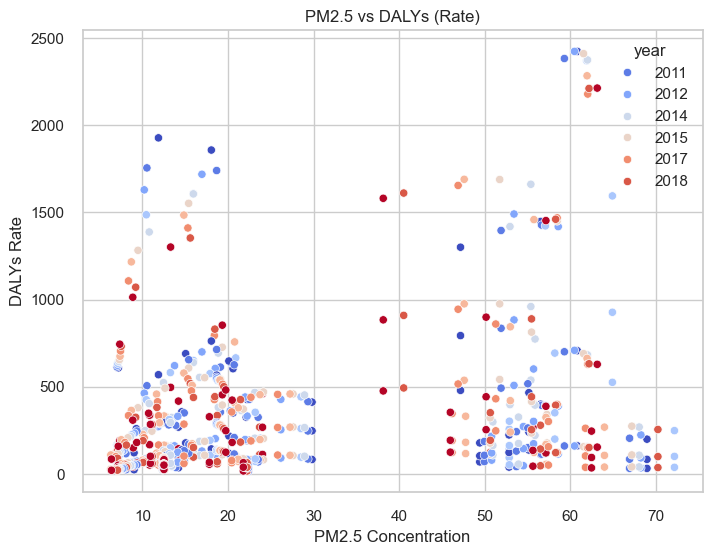

In [111]:
rate_df = df[df["metric"] == "Rate"]
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rate_df,
    x="pm25 concentration",
    y="measure val",
    hue="year",
    palette="coolwarm",
)
plt.title("PM2.5 vs DALYs (Rate)")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("DALYs Rate")
plt.show()

### 8. Correlation Matrix (Numerical Columns)

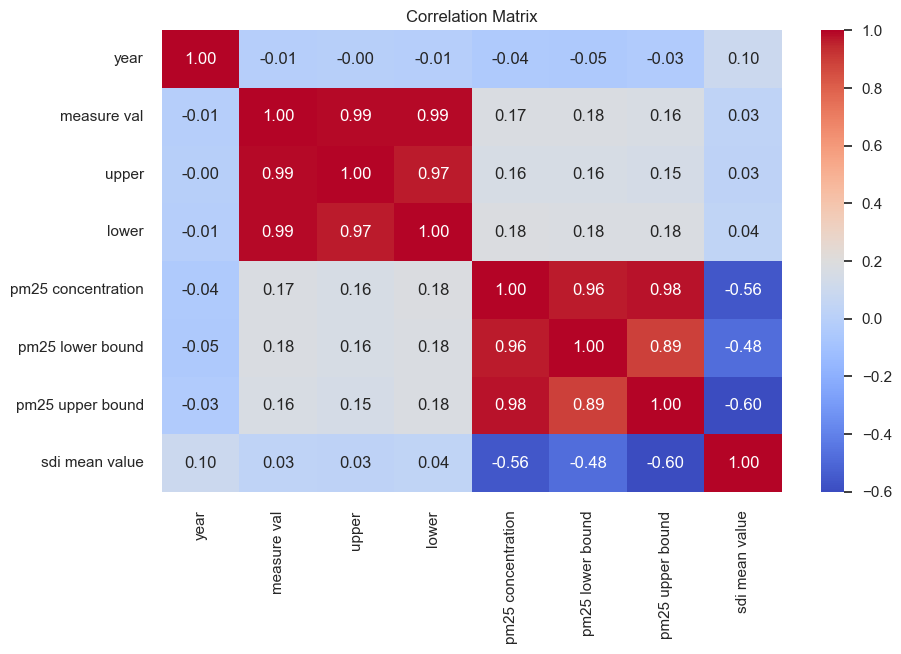

In [104]:
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### 9. SDI vs DALYs Rate

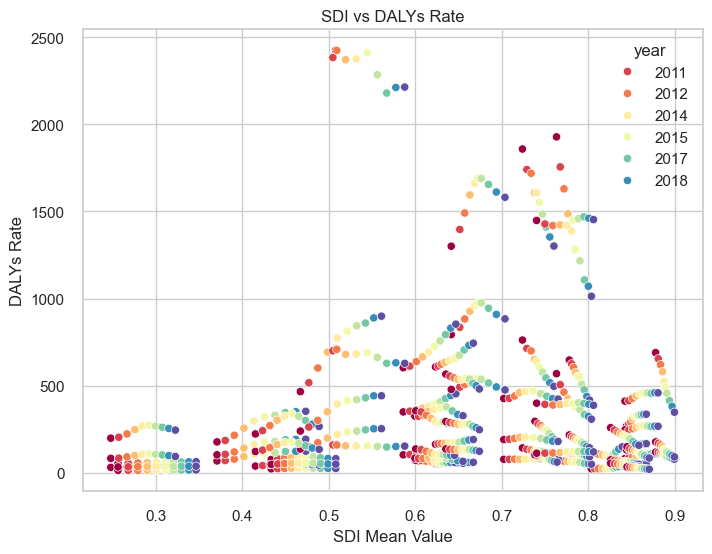

In [105]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=rate_df, x="sdi mean value", y="measure val", hue="year", palette="Spectral"
)
plt.title("SDI vs DALYs Rate")
plt.xlabel("SDI Mean Value")
plt.ylabel("DALYs Rate")
plt.show()

### 10. Group by cause and compute mean DALYs

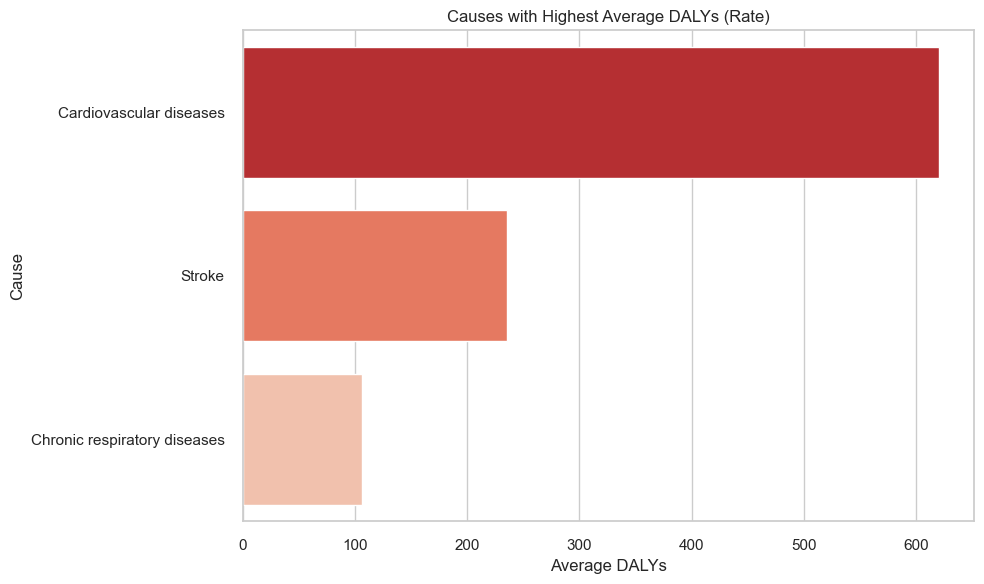

In [112]:
cause_dalys = (
    df[df["metric"] == "Rate"]
    .groupby("cause")["measure val"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=cause_dalys.values, y=cause_dalys.index, palette="Reds_r")
plt.title("Causes with Highest Average DALYs (Rate)")
plt.xlabel("Average DALYs")
plt.ylabel("Cause")
plt.tight_layout()
plt.show()

### 11. PM2.5 trend over years

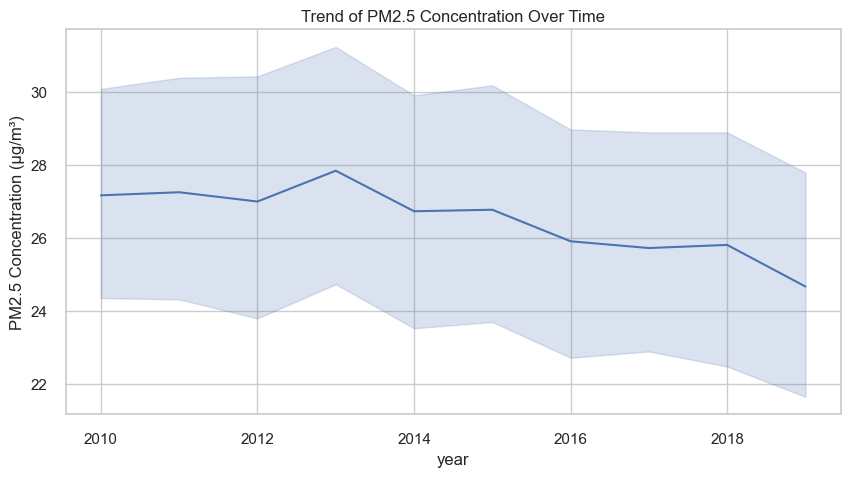

In [106]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="year", y="pm25 concentration")
plt.title("Trend of PM2.5 Concentration Over Time")
plt.ylabel("PM2.5 Concentration (µg/m³)")
plt.grid(True)
plt.show()

### 12. Mean DALYs per country (Rate)

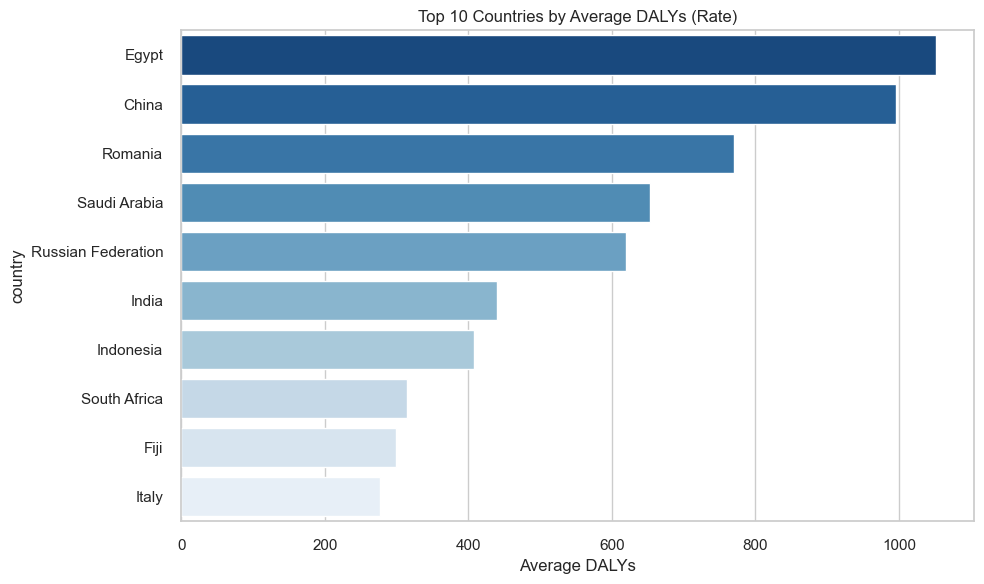

In [107]:
country_dalys = (
    df[df["metric"] == "Rate"]
    .groupby("country")["measure val"]
    .mean()
    .sort_values(ascending=False)
)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_dalys.head(10).values, y=country_dalys.head(10).index, palette="Blues_r"
)
plt.title("Top 10 Countries by Average DALYs (Rate)")
plt.xlabel("Average DALYs")
plt.tight_layout()
plt.show()

### 13. Plot PM2.5 lower vs upper bounds

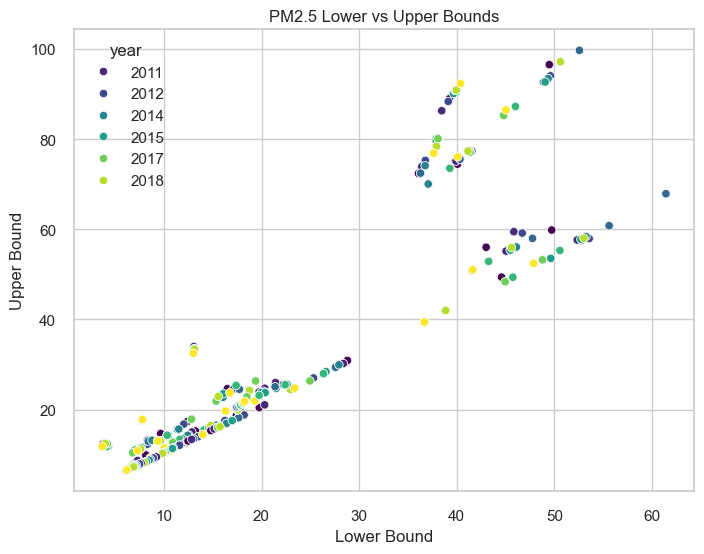

In [108]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="pm25 lower bound", y="pm25 upper bound", data=df, hue="year", palette="viridis"
)
plt.title("PM2.5 Lower vs Upper Bounds")
plt.xlabel("Lower Bound")
plt.ylabel("Upper Bound")
plt.show()

### 14. Linear regression plot

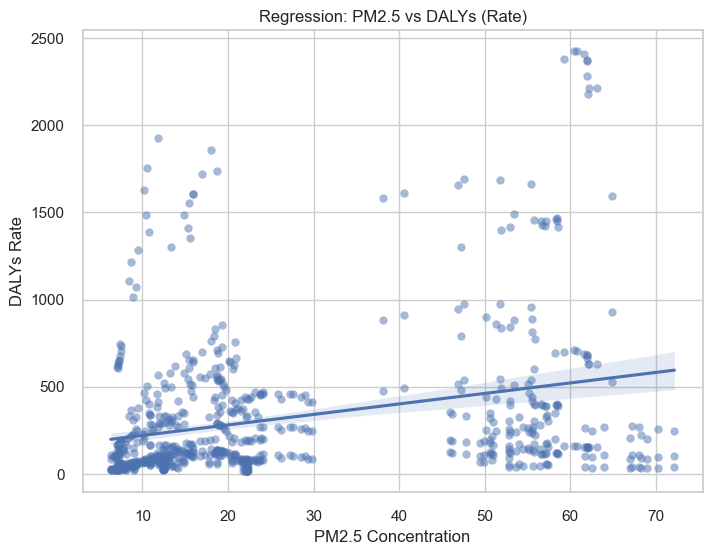

In [109]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=rate_df, x="pm25 concentration", y="measure val", scatter_kws={"alpha": 0.5}
)
plt.title("Regression: PM2.5 vs DALYs (Rate)")
plt.xlabel("PM2.5 Concentration")
plt.ylabel("DALYs Rate")
plt.show()

### 15. Group by year

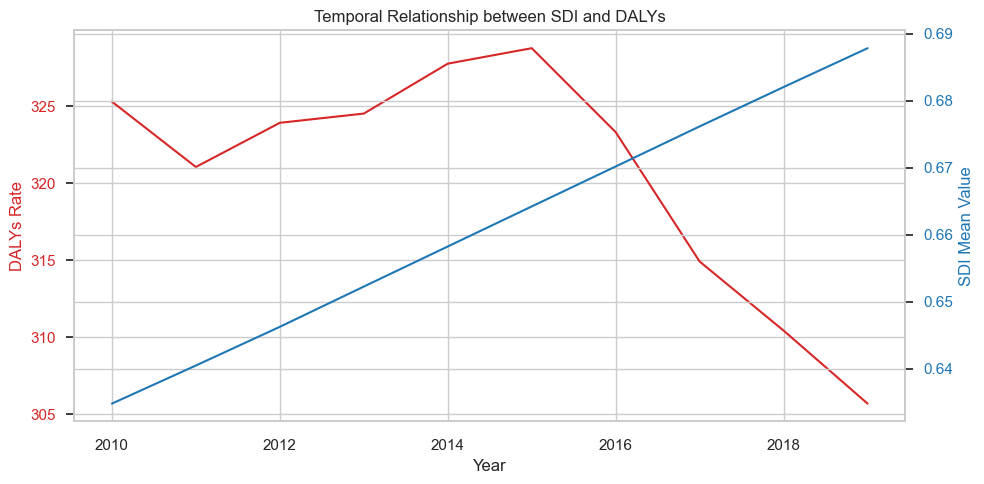

In [ ]:
yearly = rate_df.groupby("year")[["sdi mean value", "measure val"]].mean()

# Dual-axis plot
fig, ax1 = plt.subplots(figsize=(10, 5))

ax1.set_xlabel("Year")
ax1.set_ylabel("DALYs Rate", color="tab:red")
ax1.plot(yearly.index, yearly["measure val"], color="tab:red", label="DALYs")
ax1.tick_params(axis="y", labelcolor="tab:red")

ax2 = ax1.twinx()
ax2.set_ylabel("SDI Mean Value", color="tab:blue")
ax2.plot(yearly.index, yearly["sdi mean value"], color="tab:blue", label="SDI")
ax2.tick_params(axis="y", labelcolor="tab:blue")

plt.title("Temporal Relationship between SDI and DALYs")
fig.tight_layout()
plt.show()